# Recurrent Neural Network to Predict Google Stock Price

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

sns.set()

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

## Importing Datasets

In [2]:
dataset_train = pd.read_csv('../../Datasets/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

## Data Pre-Processing

### Feature Scaling

In [3]:
sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

### Data Structure with 120 Timesteps and 1 Output

In [ ]:
X_train, y_train = [], []
for i in range(120, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping the Data

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building RNN

### Initializing the RNN

In [6]:
regressor = Sequential()

### Adding LSTM Layers and Dropout Regularization

In [7]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

c:\Users\mesha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding Output Layer

In [8]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [9]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN

In [10]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 308ms/step - loss: 0.1265
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 343ms/step - loss: 0.0110
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 363ms/step - loss: 0.0065
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - loss: 0.0057
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 396ms/step - loss: 0.0052
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 353ms/step - loss: 0.0049
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - loss: 0.0053
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - loss: 0.0048
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - loss: 0.0049
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step - loss: 0.0050
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - loss: 0.0042
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - loss: 0.0038
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 327ms/step - loss: 0.0041
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - loss: 0.0040
Epoch 15/100
36/36 ━━━━━━━━━━

## Making Predictions and Visualizations

### Getting Real Stock Prices

In [11]:
dataset_test = pd.read_csv('../../Datasets/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting Predicted Stock Prices

In [12]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []
for i in range(120, len(inputs)):
    X_test.append(inputs[i-120:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step


### Visualizing the Predicted Results

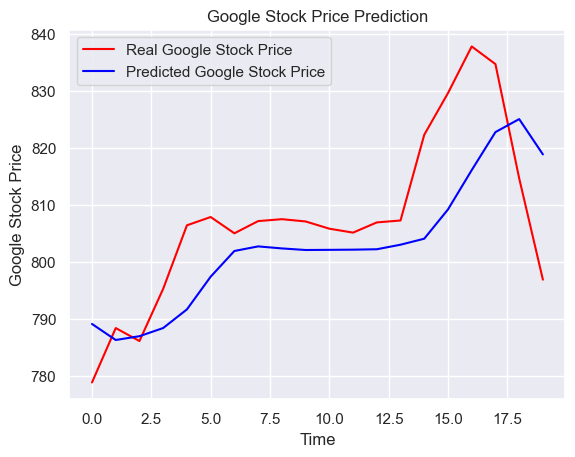

In [13]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()